# Ensemble Learning

In this project, I will be using and fine-tuning a decision tree, random forest, adaboost, and gradient boosted trees in scikit-learn.

In [1]:
# importing packages
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# making this notebook's output stable across runs
np.random.seed(0)

In [20]:
# Creating useful funtion for the project
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Synthetic Moon dataset
The goal of this project is to classify a moon shaped synthetic dataset with two features (_x1_ and _x2_) and two classes (0 or 1) with some added noise. 

In [21]:
# loading the moon train and test data from CSV files
train = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/halfmoon_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/halfmoon_test.csv")

train_x = train.iloc[:,0:2]
train_y = train.iloc[:,2]

test_x = test.iloc[:,0:2]
test_y = test.iloc[:,2]

print("Number of train data: {}".format(len(train_y)))
print("Number of test data: {}".format(len(test_y)))

Number of train data: 3000
Number of test data: 1000


Text(0, 0.5, 'x2')

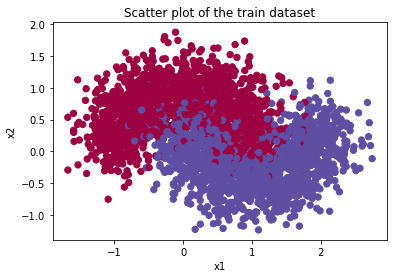

In [4]:
# plotting the train dataset
plt.scatter(train_x.x1, train_x.x2, s=40, c=train_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the train dataset')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

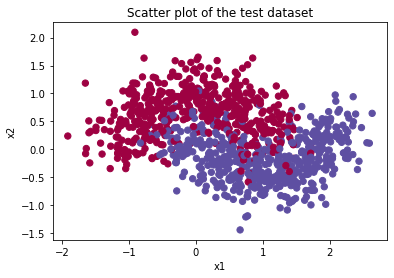

In [5]:
# plotting the test dataset
plt.scatter(test_x.x1, test_x.x2, s=40, c=test_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the test dataset')
plt.xlabel('x1')
plt.ylabel('x2')

## Decision Tree Classifier

First, we learn a decision tree classifier to separate the two classes in the moon dataset. Note that decision boundary is axis-parallel.

In [6]:
# Building Decision Tree classifier
parameters = {
    "max_depth": [2, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

dtc = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc, parameters, cv=3)
dtc_grid.fit(train_x, train_y)

# summarizing the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.8853333333333334
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05}


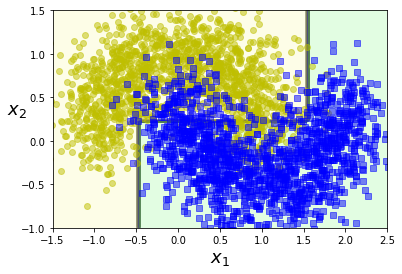

In [7]:
# plotting the decision boundary
plot_decision_boundary(dtc_grid, train_x.values, train_y.values)

In [8]:
# making predictions and evaluating the model performance on test data
test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.892
model ROC AUC: 0.8990000000000001


---

## Random Forest

Applying the Random Forest Classifier provided in scikit-learn to classify the synthetic moon data.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [9]:
# fine-tuning Random Forest classifier using grid search with cross-validation (GridSearchCV).
parameters = {
    "n_estimators": [20, 40],
    "max_depth": [2, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), parameters, cv=3)
rfc_grid.fit(train_x, train_y)

# summarizing the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.8893333333333334
The best hyper parameter setting is {'max_depth': 4, 'min_samples_split': 0.05, 'n_estimators': 40}


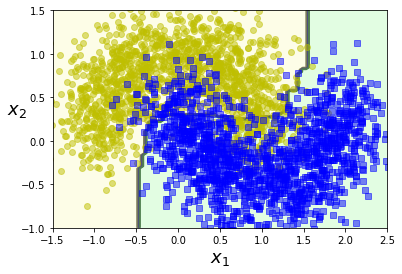

In [10]:
# plotting the decision boundary
plot_decision_boundary(rfc_grid, train_x.values, train_y.values)

Notice that the decision boundary is no longer orthogonal to the x and y axises and is able to better separate the two classes in the moon dataset.

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate it's performance in terms of accuracy and ROC AUC. It should outperform our simplified version of Random Forest as there are more optimizations being implemented in scikit-learn API.

In [11]:
# Making predictions and evaluating the model performance on test data
test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.887
model ROC AUC: 0.9500460000000001


---

## AdaBoost
Applying an AdaBoost classifier in scikit-learn to classify the synthetic moon dataset.

### Train AdaBoost model
The AdaBoost algorithm works by learning each base learner so that it corrects the mis-classified data points from previous classifiers, and use weighted voting of predictions from each base learners for the final prediction. 

There are two key hyper-parameters:
- n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.


In [12]:
# Fine-tuning Adaboost with decision tree (max_depth=4) as base learners using grid search with cross-validation (GridSearchCV).
parameters = {
    "n_estimators": [20, 40],
    "learning_rate": [0.01, 0.1, 1, 10]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.9016666666666667
The best hyper parameter setting is {'learning_rate': 0.1, 'n_estimators': 20}


Visualizing the decision boundaries.

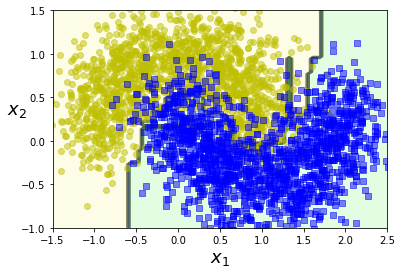

In [13]:
# plotting the decision boundary
plot_decision_boundary(adaboost_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [14]:
# Making predictions and evaluating the model performance on test data
test_z = adaboost_grid.predict(test_x)
test_z_prob = adaboost_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.899
model ROC AUC: 0.959744


---

## Gradient Boosted Trees
Applying the Gradient Boosted Tree classifier provided in scikit-learn to classify the synthetic moon dataset.

Gradient Boosted Trees is a generalization of boosting to arbitrary differentiable loss functions, which can be used for both regression and classification problems. At a high level, gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Gradient Boosted Trees, which is a special case of gradient boosting, uses regression trees as the base predictors and builds an additive model in a forward stage-wise fashion. In each stage, regression trees are fit on the negative gradient of the loss function used in a classification or a regression problem. 
Gradient boosting introduces a new hyperparameter *learning_rate*, which scales the contribution of each tree. If you set it to a low values, such as 0.1, you will need more trees in the ensemble to fit the training data, but the predictions will usually generalize better. This is a regularization technique called shrinkage. 

In [15]:
# Fine-tuning Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [0.05, 0.1, 0.2],
    "max_depth":[2, 4],
    "n_estimators":[100]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(train_x, train_y)

# summarizing the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9116666666666667
The best hyper parameter setting is {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_split': 0.1, 'n_estimators': 100}


Visualizing the decision boundaries.

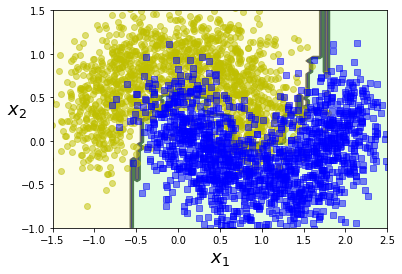

In [16]:
# plotting the decision boundary for decision tree classifier
plot_decision_boundary(gbc_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [17]:
# Making predictions and evaluating the model performance on test data
test_z = gbc_grid.predict(test_x)
test_z_prob = gbc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.9
model ROC AUC: 0.96187


---

## Implementing a Random Forest Classifier from scratch

The random forest classifier will. 
- Use bootstrapping to generate different ensemble datasets, where it will train a separate classifier to each dataset.
- Apply grid search with cross-validation to learn and fine-tune each decision tree classifier.
- Implement two predict functions: one outputs the probabilities while the other outputs the predicted class.

In [18]:
class MyRandomForestClassifier:
    """
    Random Forest Classifier.
    """
    def __init__(self, n_estimators=100, models=None):
        self.n_estimators = n_estimators
        self.models = models

    def train(self, x, y):
        """
        Train random forest classifier using bootstrapping and decision tree as the base classifier
        """
        self.models = [None] * self.n_estimators
        for i in range(self.n_estimators):
            # boostrapping
            if i % 10 == 0:
                print("Bootstrapping for estimator {}.".format(i))
            x, y = resample(train_x.values, train_y, replace=True)

            # build decision tree
            parameters = {
              "max_depth": [2, 4],
              "min_samples_split": [0.05, 0.1, 0.2]
            }

            dtc_grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3)
            dtc_grid.fit(x, y)

            self.models[i] = dtc_grid

    def predict_proba(self, x):
        """
        Make predictions (probabilities) with the trained random forest
        """
        if self.models == None:
            sys.exit("The model has not been trained yet. Please call train() first. Exiting...")

        predictions = pd.DataFrame(np.zeros((x.shape[0], self.n_estimators)))
        for i in range(self.n_estimators):
            predictions.iloc[:, i] = self.models[i].predict(x)

        return predictions.sum(axis=1) / self.n_estimators

    def predict(self, x):
        """
        Make predictions (the class/label) with the trained random forest
        """
        probabilities = self.predict_proba(x)
        prediction = pd.Series([1] * len(probabilities))
        prediction[probabilities < 0.5] = 0

        return prediction.values

### Train, predict and evaluate the random forest classifier

Even though this is a simplified version of random forest, we should see it outperforms the decision tree classifier above.

In [19]:
# Training the random forest classifier
mrfc = MyRandomForestClassifier(100)
mrfc.train(train_x, train_y)

# making predictions with the trained random forest
test_z = mrfc.predict(test_x)
test_z_prob = mrfc.predict_proba(test_x)

# evaluating the model performance
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

Bootstrapping for estimator 0.
Bootstrapping for estimator 10.
Bootstrapping for estimator 20.
Bootstrapping for estimator 30.
Bootstrapping for estimator 40.
Bootstrapping for estimator 50.
Bootstrapping for estimator 60.
Bootstrapping for estimator 70.
Bootstrapping for estimator 80.
Bootstrapping for estimator 90.
model accuracy: 0.893
model ROC AUC: 0.9149540000000002


## Conclusion

By comparing the model performance as well as the decision boundaries learned from different classifiers on the same dataset, we clearly see ensemble learning is capable of modeling more complex patterns in the data as compared to decision trees, leading to superior performance on the test dataset.